# HW Week2 Answers


In [1]:
# The usual preamble
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.__version__

'0.19.2+0.g825876c.dirty'

If you don't have version 0.19, you got errors when you read in the first data set.
We talked thru how to update it in class.  You should update. I can help you.

## Part 1: Filtering and Counting Things

In [8]:
df = pd.read_csv('data/chicago_crimes.csv', parse_dates=['Date-Time'], dayfirst=False,)

In [3]:
df.describe()

,identification,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,2.000000e+03,2000.000000,1780.000000,2000.000000,2000.000000,1.780000e+03,1.780000e+03,2000.0,1780.000000,1780.000000
mean,6.267862e+06,1231.581500,11.565730,23.295500,37.269500,1.164729e+06,1.886418e+06,2008.0,41.843926,-87.671010
std,6.699590e+05,713.767292,7.007958,13.768259,21.817398,1.616071e+04,3.174306e+04,0.0,0.087297,0.058810
min,4.379000e+03,111.000000,1.000000,1.000000,1.000000,1.100635e+06,1.814278e+06,2008.0,41.645636,-87.905312
25%,5.994172e+06,631.000000,6.000000,11.000000,22.000000,1.153470e+06,1.859010e+06,2008.0,41.768470,-87.711982
50%,6.000126e+06,1115.000000,10.000000,24.000000,32.000000,1.165820e+06,1.891388e+06,2008.0,41.857613,-87.666840
75%,6.142792e+06,1821.250000,17.000000,34.000000,57.000000,1.176344e+06,1.910260e+06,2008.0,41.909694,-87.628180
max,9.249024e+06,2535.000000,31.000000,50.000000,77.000000,1.204829e+06,1.951407e+06,2008.0,42.022291,-87.525651


The problem above is that some of those columns have numbers, but not measures you can do math on. The Beat, District, Ward, Community Area, and id are codes, so you can't take their mean, avg, max etc...  We should change them to string types, of "object" in pandas type notation.

In [25]:
df = df.astype({"Ward":"object","Beat":"object", "District":"object", "identification":"object", "Community Area": "object"}, copy=True)

In [27]:
# we can live with these being numbers
df.describe()

,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,1.780000e+03,1.780000e+03,2000.0,1780.000000,1780.000000
mean,1.164729e+06,1.886418e+06,2008.0,41.843926,-87.671010
std,1.616071e+04,3.174306e+04,0.0,0.087297,0.058810
min,1.100635e+06,1.814278e+06,2008.0,41.645636,-87.905312
25%,1.153470e+06,1.859010e+06,2008.0,41.768470,-87.711982
50%,1.165820e+06,1.891388e+06,2008.0,41.857613,-87.666840
75%,1.176344e+06,1.910260e+06,2008.0,41.909694,-87.628180
max,1.204829e+06,1.951407e+06,2008.0,42.022291,-87.525651


In [28]:
df.head()

,identification,Case Number,Date-Time,Date,Time,Block,Street,IUCR,Primary Type,Description,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Location,Latitude,Longitude
0,7446859,HS247325,2008-01-01 00:01:00,1/1/08,0:01,004XX E 133RD ST,E 133RD ST,841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,...,9,54,6,NaN,NaN,2008,4/30/10 1:15,NaN,NaN,NaN
1,6236266,HP323693,2008-01-01 00:01:00,1/1/08,0:01,013XX E 49TH ST,E 49TH ST,840,THEFT,FINANCIAL ID THEFT: OVER $300,...,4,39,6,1186146.0,1872823.0,2008,5/24/08 1:05,"(41.80615476732223, -87.59280284925518)",41.806155,-87.592803
2,7514546,HS317259,2008-01-01 00:01:00,1/1/08,0:01,014XX E 59TH ST,E 59TH ST,840,THEFT,FINANCIAL ID THEFT: OVER $300,...,5,41,6,NaN,NaN,2008,5/24/10 1:12,NaN,NaN,NaN
3,6422569,HP499242,2008-01-01 00:01:00,1/1/08,0:01,014XX E 62ND ST,E 62ND ST,840,THEFT,FINANCIAL ID THEFT: OVER $300,...,20,42,6,1186762.0,1864130.0,2008,8/17/08 1:04,"(41.78228592790556, -87.5908189949899)",41.782286,-87.590819
4,6013347,HP118097,2008-01-01 00:01:00,1/1/08,0:01,014XX E 72ND PL,E 72ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,...,5,43,26,1187119.0,1857171.0,2008,1/16/08 1:05,"(41.76318136897587, -87.58973074990949)",41.763181,-87.589731


In [52]:
# What are the columns in this data set?
df.columns

Index(['identification', 'Case Number', 'Date-Time', 'Date', 'Time', 'Block',
       'Street', 'IUCR', 'Primary Type', 'Description', 'Location Description',
       'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area',
       'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Updated On',
       'Location', 'Latitude', 'Longitude'],
      dtype='object')

In [ ]:
# Q1: what are all the Primary Types?  Hint: use unique

In [33]:
df['Primary Type'].unique()

array(['THEFT', 'OTHER OFFENSE', 'CRIM SEXUAL ASSAULT', 'CRIMINAL DAMAGE',
       'SEX OFFENSE', 'OFFENSE INVOLVING CHILDREN', 'DECEPTIVE PRACTICE',
       'CRIMINAL TRESPASS', 'MOTOR VEHICLE THEFT', 'BATTERY', 'ASSAULT',
       'BURGLARY', 'INTERFERE WITH PUBLIC OFFICER', 'WEAPONS VIOLATION',
       'NARCOTICS', 'PUBLIC PEACE VIOLATION', 'ROBBERY',
       'LIQUOR LAW VIOLATION', 'OBSCENITY', 'KIDNAPPING', 'PROSTITUTION',
       'HOMICIDE', 'STALKING', 'ARSON'], dtype=object)

In [ ]:
# Q2: Find out how many of each type occur.

**NOTE: This was not meant to be counting the number of unique items.**

**In class I saw a lot of people trying to use .value_counts on the entire df -  `df.value_counts()`.  Why doesn't this work?  What is it counting?  You need to pick only a column to count!**

In [34]:
df['Primary Type'].value_counts()

THEFT                            605
BATTERY                          358
CRIMINAL DAMAGE                  187
OTHER OFFENSE                    160
NARCOTICS                        126
DECEPTIVE PRACTICE                95
ASSAULT                           87
BURGLARY                          68
MOTOR VEHICLE THEFT               59
OFFENSE INVOLVING CHILDREN        49
CRIMINAL TRESPASS                 42
ROBBERY                           38
CRIM SEXUAL ASSAULT               34
WEAPONS VIOLATION                 33
SEX OFFENSE                       29
PUBLIC PEACE VIOLATION             7
PROSTITUTION                       6
LIQUOR LAW VIOLATION               5
HOMICIDE                           3
ARSON                              3
INTERFERE WITH PUBLIC OFFICER      2
STALKING                           2
KIDNAPPING                         1
OBSCENITY                          1
Name: Primary Type, dtype: int64

In [ ]:
# Q3: Make a bar chart of the top 10

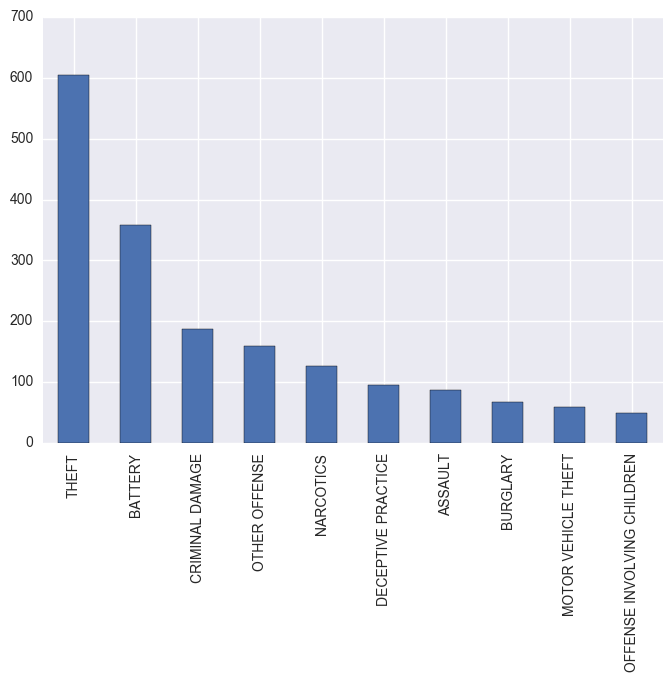

In [35]:
df['Primary Type'].value_counts()[0:10].plot(kind="bar")

In [ ]:
# Q4: Make a new dataframe of just the theft types.

In [45]:
thefts = df[df['Primary Type'] == 'THEFT']

In [46]:
len(thefts)  # or head etc

605

In [ ]:
# Q5: Get the counts of each Description type inside the Thefts dataframe. 

In [48]:
thefts['Description'].value_counts()

FINANCIAL ID THEFT: OVER $300       247
FROM BUILDING                        87
$300 AND UNDER                       82
FINANCIAL ID THEFT:$300 &UNDER       68
OVER $300                            60
RETAIL THEFT                         24
AGG: FINANCIAL ID THEFT              13
ATTEMPT FINANCIAL IDENTITY THEFT     10
PURSE-SNATCHING                       7
POCKET-PICKING                        5
OVER $500                             1
FROM COIN-OP MACHINE/DEVICE           1
Name: Description, dtype: int64

In [ ]:
# Q6: Using your answer above, make a bar chart of the Description type counts.

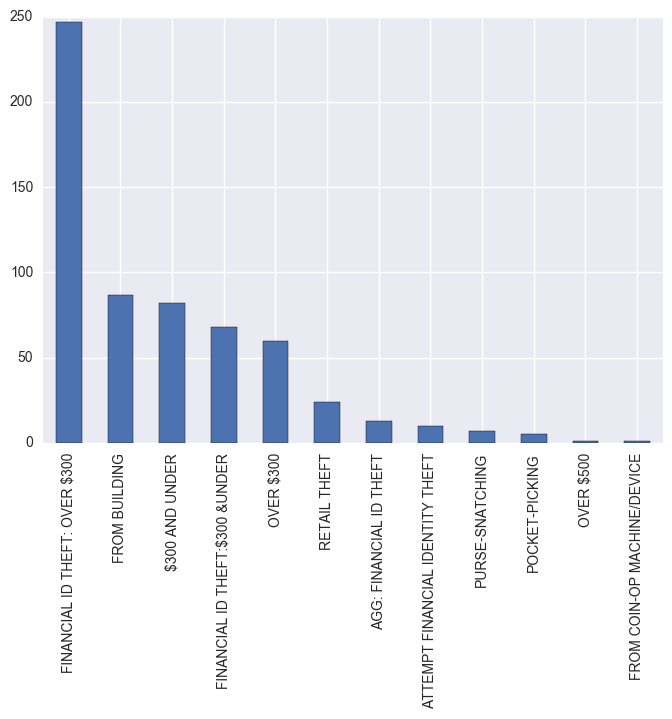

In [50]:
thefts['Description'].value_counts().plot(kind="bar")

In [ ]:
# Q7: What percentage of all crimes in this data occur in Ward 42? Hint: just find out how many occur in ward 42 and then divide by all crimes.

In [220]:
df['Ward'].value_counts().head()

42    97
28    83
24    72
6     70
15    70
Name: Ward, dtype: int64

In [65]:
len(df)

2000

In [73]:
97/len(df) * 100

4.8500000000000005

In [ ]:
# Q8: What is the most common crime Primary Type that results in an arrest?

**NOTE: When pandas reads in columns with "True" or "False" it assigns booleans `True` and `False`. So no quotes.**

In [81]:
arrests = df['Arrest'] == True

In [76]:
df[arrests]['Primary Type'].value_counts()

NARCOTICS                        123
BATTERY                           93
CRIMINAL TRESPASS                 31
WEAPONS VIOLATION                 30
THEFT                             28
ASSAULT                           28
CRIMINAL DAMAGE                   12
OTHER OFFENSE                     12
CRIM SEXUAL ASSAULT                9
DECEPTIVE PRACTICE                 8
OFFENSE INVOLVING CHILDREN         7
PROSTITUTION                       6
PUBLIC PEACE VIOLATION             6
LIQUOR LAW VIOLATION               5
MOTOR VEHICLE THEFT                5
SEX OFFENSE                        4
HOMICIDE                           3
ROBBERY                            2
INTERFERE WITH PUBLIC OFFICER      2
BURGLARY                           2
OBSCENITY                          1
Name: Primary Type, dtype: int64

## Part 2: Stats

In [10]:
# load in the paris rainfall data -- you should be using the paris_rain_clean.csv version.

**NOTE: Many of you missed the in-class announcement to use this cleaner data set. It was also on the forum. Wtf.**

In [3]:
rain = pd.read_csv('data/paris_rain_clean.csv', index_col='Year')  # there is one year per row, it can be our index

In [6]:
rain.describe()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
count,303.000000,304.000000,304.000000,304.000000,303.000000,302.000000,302.000000,302.000000,301.000000,301.000000,301.000000,301.000000
mean,43.036304,36.490132,38.394737,43.601974,53.782178,52.738411,55.910596,51.205298,48.242525,51.790698,49.102990,47.039867
std,24.103433,23.937899,23.326541,25.048787,26.600156,29.167538,32.651212,30.321383,27.344792,30.603802,26.572781,26.851041
min,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,19.000000,21.000000,24.000000,34.000000,32.000000,34.000000,29.000000,28.000000,29.000000,29.000000,27.000000
50%,40.000000,32.000000,35.000000,41.000000,50.000000,49.000000,49.000000,47.000000,46.000000,46.000000,46.000000,44.000000
75%,58.500000,48.250000,52.000000,62.000000,70.500000,70.000000,73.750000,65.000000,66.000000,67.000000,64.000000,65.000000
max,118.000000,135.000000,128.000000,137.000000,135.000000,195.000000,204.000000,201.000000,149.000000,167.000000,139.000000,146.000000


In [8]:
rain.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1688,NaN,75.0,47.0,9.0,43.0,46.0,44.0,49.0,NaN,NaN,NaN,NaN
1689,36.0,22.0,22.0,37.0,18.0,20.0,116.0,41.0,45.0,50.0,66.0,18.0
1690,70.0,32.0,43.0,24.0,68.0,63.0,73.0,79.0,21.0,64.0,23.0,9.0
1691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
rain.tail()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2005,44.0,27.0,48.0,57.0,46.0,54.0,34.0,31.0,31.0,21.0,27.0,28.0
2006,31.0,60.0,73.0,25.0,57.0,24.0,56.0,102.0,42.0,45.0,52.0,67.0
2007,28.0,79.0,41.0,5.0,102.0,53.0,74.0,159.0,18.0,42.0,29.0,60.0
2008,49.0,32.0,76.0,51.0,67.0,15.0,40.0,95.0,17.0,61.0,50.0,29.0
2009,46.0,38.0,31.0,42.0,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# notice there is an extra space in the name for Dec.
rain.columns

Index(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec '],
      dtype='object')

In [112]:
# Q8: use .loc to get all the rain values for the year 1700

In [5]:
rain.loc['1700']

Jan      27.0
Feb      30.0
Mar      30.0
Apr      63.0
May      39.0
Jun     100.0
Jul      81.0
Aug      20.0
Sep       3.0
Oct      54.0
Nov      58.0
Dec      38.0
Name: 1700, dtype: float64

In [ ]:
# Q9: Sort by rain amount in January, ascending=False. Now get the top row. What's the year?

In [202]:
rain.sort_values(by="Jan", ascending=False).iloc[0]

Jan    118.0
Feb     61.0
Mar     76.0
Apr     26.0
May     67.0
Jun     22.0
Jul    126.0
Aug     27.0
Sep     46.0
Oct     68.0
Nov     37.0
Dec     60.0
Name: 1988-01-01 00:00:00, dtype: float64

In [14]:
# If you want to actually pull out the year, you need to use .name for the row index:
rain.sort_values(by="Jan", ascending=False).iloc[0].name

'1988'

In [133]:
# Q10: find the values for the month of June. Plot in a bar chart. (It's ok if you can't read the x axis labels.)

**NOTE: I said values, but I don't mean use value_counts. You are supposed to plot the actual values over time. Value_counts will summarize how many of each value occurred, like making a histogram.**

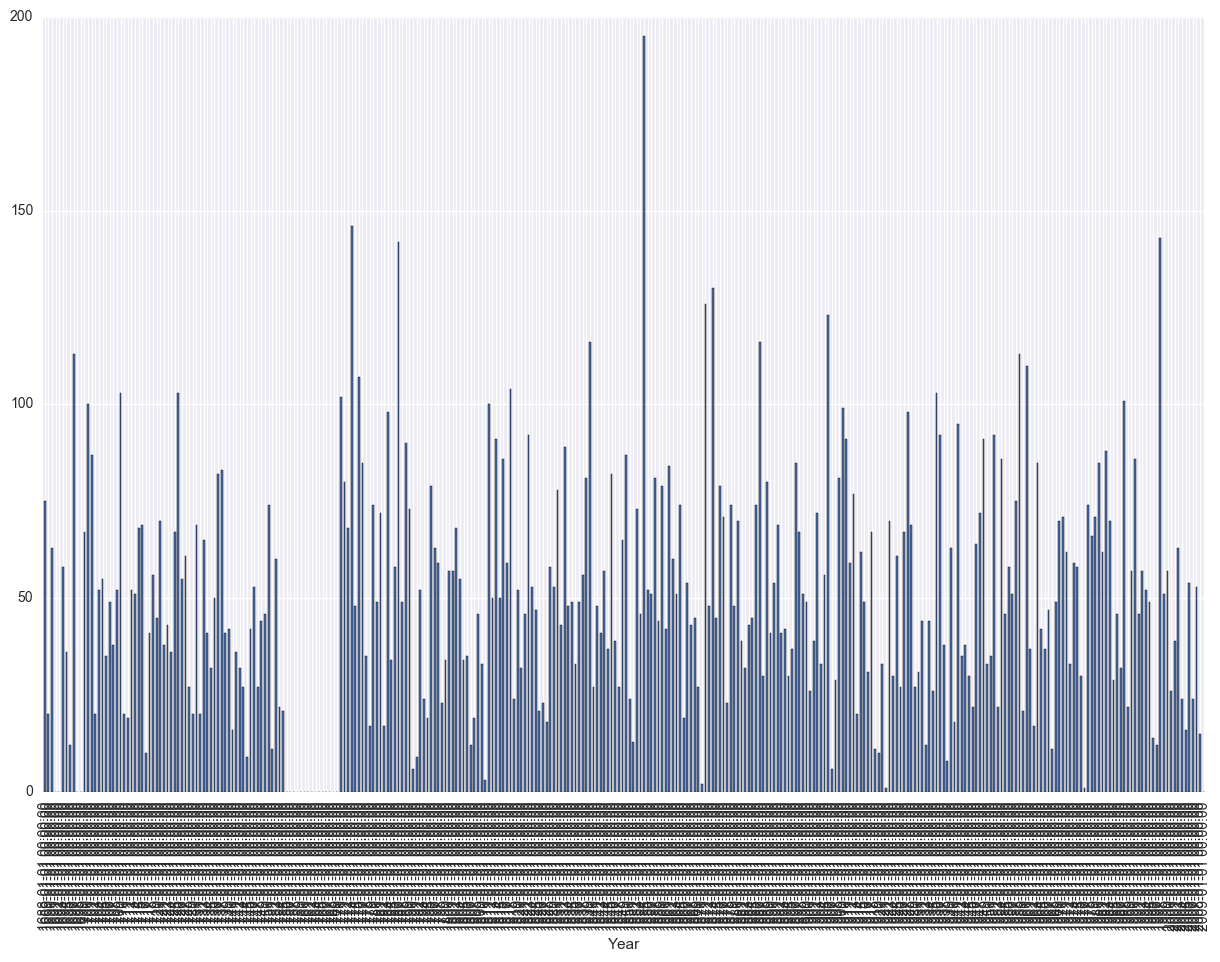

In [203]:
rain['Jun'].plot(kind="bar", figsize=(15,10))

In [ ]:
# Q11: What are the max and min values for Jun?  What is the median?

In [204]:
rain['Jun'].max()

195.0

In [205]:
rain['Jun'].min()

1.0

In [206]:
# yes, this function exists.  alot of you missed it.
rain['Jun'].median()

49.0

In [207]:
# Q12: Make a histogram for one month's rain.

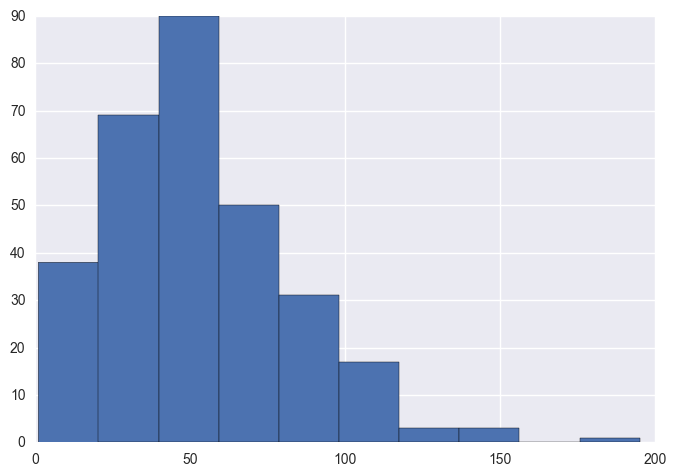

In [7]:
rain['Jun'].hist()

In [213]:
# Q13: create a column for the total rain each year.  It's okay if you have a NaN for years with columns with missing data, too.

**NOTE: Most of you added these up manually.  You can also use this function.  Axis=1 means use sum across the row, not the column.**

In [6]:
rain['Total'] = rain.apply(sum, axis=1)

In [7]:
rain['Total']

Year
1688       NaN
1689     491.0
1690     569.0
1691       NaN
1692       NaN
1693     614.0
1694     322.0
1695     532.0
1696     527.0
1697       NaN
1698       NaN
1699     506.0
1700     543.0
1701     578.0
1702     442.0
1703     468.0
1704     539.0
1705     376.0
1706     375.0
1707     486.0
1708     495.0
1709     591.0
1710     426.0
1711     682.0
1712     572.0
1713     559.0
1714     391.0
1715     473.0
1716     388.0
1717     478.0
         ...  
1980     689.0
1981     746.0
1982     701.0
1983     623.0
1984     745.0
1985     501.0
1986     612.0
1987     706.0
1988     734.0
1989     597.0
1990     501.0
1991     469.0
1992     645.0
1993     664.0
1994     699.0
1995     671.0
1996     453.0
1997     667.0
1998     671.0
1999     745.0
2000     901.0
2001     838.0
2002     685.0
2003     457.0
2004     546.0
2005     448.0
2006     634.0
2007     690.0
2008     582.0
2009       NaN
Name: Total, dtype: float64

In [ ]:
# Q14: Plot the proportion or percentage of rain for each January out of the total (hint: jan/total), using a line chart.

**NOTE: If you don't use the () here around the math, it won't plot the right thing.**

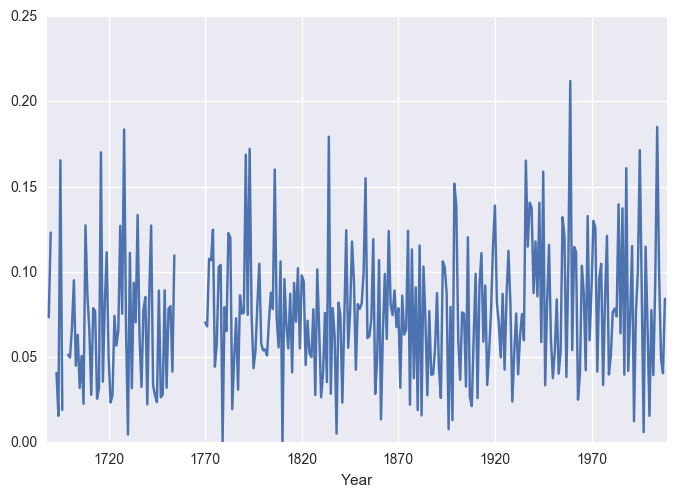

In [216]:
(rain['Jan']/rain['Total']).plot()